In [74]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_fscore_support
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline

# Importing the dataset

In [28]:
# Importing examples of red wine
df_red = pd.read_csv('data/winequality-red.csv', delimiter=';')
df_red.head(6)
display(df_red)
print(df_red.shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


(1599, 12)


In [29]:
# Importing examples of white wine
df_white = pd.read_csv('data/winequality-white.csv', delimiter=';')
df_white.head(6)
display(df_white)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


In [30]:
# Reduce data to random samples of size N
# Can set N to whatever you want
N = 1500
df_red = df_red[:N]
df_white = df_white[:N]

In [31]:
print("Red Wine:")
display(np.round(df_red.describe()))
print("White Wine:")
display(np.round(df_white.describe()))

Red Wine:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,47.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,13.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,63.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


White Wine:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0
mean,7.0,0.0,0.0,6.0,0.0,35.0,144.0,1.0,3.0,0.0,10.0,6.0
std,1.0,0.0,0.0,5.0,0.0,17.0,45.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,3.0,19.0,1.0,3.0,0.0,8.0,3.0
25%,6.0,0.0,0.0,2.0,0.0,23.0,113.0,1.0,3.0,0.0,9.0,5.0
50%,7.0,0.0,0.0,5.0,0.0,34.0,142.0,1.0,3.0,0.0,10.0,6.0
75%,7.0,0.0,0.0,10.0,0.0,46.0,173.0,1.0,3.0,1.0,11.0,6.0
max,11.0,1.0,2.0,22.0,0.0,131.0,366.0,1.0,4.0,1.0,14.0,9.0


In [32]:
# Get column names
column_names = list(df_red)
for i in range(len(column_names)):
    print(i, column_names[i])

0 fixed acidity
1 volatile acidity
2 citric acid
3 residual sugar
4 chlorides
5 free sulfur dioxide
6 total sulfur dioxide
7 density
8 pH
9 sulphates
10 alcohol
11 quality


In [33]:
# Add column of zeros to red wine values
red = df_red.values
zeros = np.zeros((red.shape[0], 1))
red = np.hstack((red, zeros))

In [34]:
# Add column of ones to white wine values
white = df_white.values
ones = np.ones((white.shape[0], 1))
white = np.hstack((white, ones))
#print(white[:1, :])

# Unsupervised Analysis

## Plotting all attributes against quality

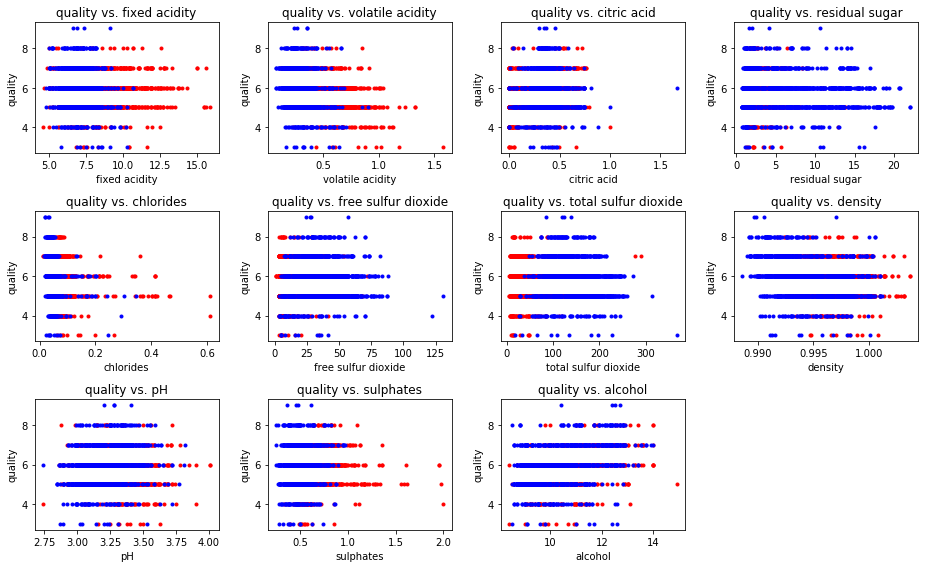

In [35]:
# Plotting all against quality

quality_index = 11

# figsize=(width, height)
plt.figure(figsize=(13, 8))

for i in range(len(column_names)):
    if i != quality_index:
        plt.subplot(3, 4, i+1)
        x_label = column_names[i]
        y_label = column_names[quality_index]
        plt.plot(red[:, i], red[:, quality_index], 'r.')
        plt.plot(white[:, i], white[:, quality_index], 'b.')
        plt.title(y_label + " vs. " + x_label)
        plt.xlabel(x_label)
        plt.ylabel(y_label)

plt.tight_layout()
plt.show()

## Plotting all attributes against alcohol

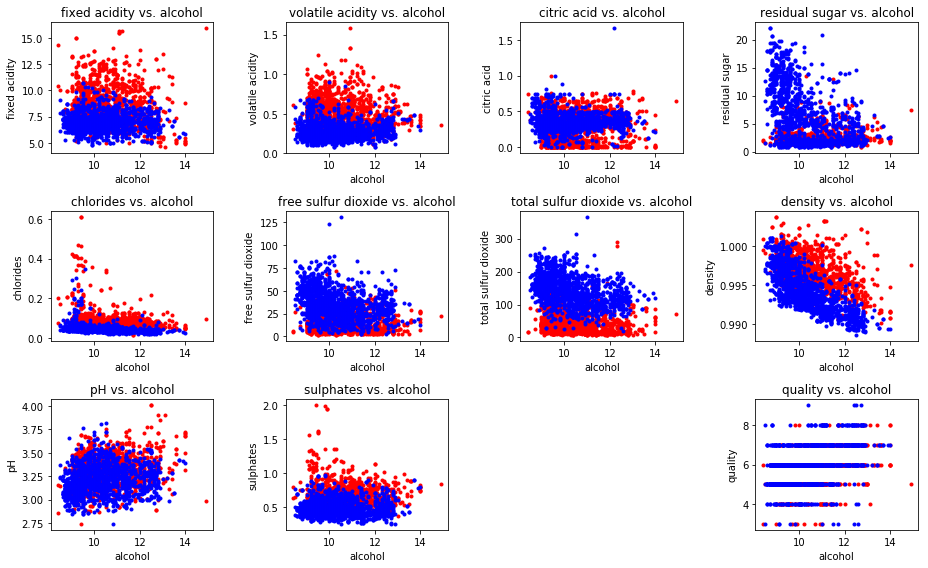

In [36]:
# Plotting all against alcohol

alcohol_index = 10

# figsize=(width, height)
plt.figure(figsize=(13, 8))

for i in range(len(column_names)):
    if i != alcohol_index:
        plt.subplot(3, 4, i+1)
        x_label = column_names[alcohol_index]
        y_label = column_names[i]
        plt.plot(red[:, alcohol_index], red[:, i], 'r.')
        plt.plot(white[:, alcohol_index], white[:, i], 'b.')
        plt.title(y_label + " vs. " + x_label)
        plt.xlabel(x_label)
        plt.ylabel(y_label)

plt.tight_layout()
plt.show()

# Supervised Analysis

## Predicting wine type using Logistic Regression

### Data Preprocessing

In [60]:
# Separate y's from red
red_y = red[:, -1]
# print(display(red))
red_y = np.reshape(red_y, (len(red_y), 1))
# display(red_y)
red_x = red[:, :-1]
# Separate y's from white
white_y = white[:, -1]
white_y = np.reshape(white_y, (len(white_y), 1))
white_x = white[:, :-1]

# print("red-y shape:", red_y.shape)
# print("white-y shape", white_y.shape)
# Combine red and white data into a single matrix
x = np.vstack((red_x, white_x))
df = pd.DataFrame(x)
# Scale x data
x_scale = preprocessing.scale(x)
# Combine y's from red and white into a single vector
y = np.vstack((red_y, white_y))

# print("X shape:", x_scale.shape)
# print("y shape:", y.shape)
# print(x_scale[:6, :])
# print(y[:6, :])

# Splitting data into training and test data

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, )
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2250, 12)
(2250, 1)
(750, 12)
(750, 1)


### Using Logistic Regression

In [61]:
def runLogReg(x_train, y_train, x_test, y_test, lamb = 10000000):
    logreg = LogisticRegression(C=lamb)
    # Fixing dimensions of y_train
    y_train = np.reshape(y_train, (len(y_train), ))
    # Fitting logistic regression model to training data
    logreg.fit(x_train, y_train)
    y_hat = logreg.predict(x_test)
    # Getting accuracy of model
    acc = logreg.score(x_test, y_test)
    w = logreg.coef_
    w0 = logreg.intercept_
    prec , recal , fscore,_ = precision_recall_fscore_support(y_test, y_hat)
    return w, w0, acc, prec , recal , fscore, _

For lamba = 0.0001
	W-vector: [-0.0007286  -0.00064482  0.00045018  0.00128111 -0.00047698 -0.00057967
  0.00084575 -0.00052911  0.00030868 -0.00053792 -0.00028502  0.0017603 ]
	w0: -0.10527841672289869
	Acc: 0.48533333333333334
	Precision: [0.         0.         0.52089136 0.47909968 0.35       0.
 0.        ]
	Recall: [0.         0.         0.71102662 0.48534202 0.24137931 0.
 0.        ]
	fscore: [0.         0.         0.60128617 0.48220065 0.28571429 0.
 0.        ]
For lamba = 0.01
	W-vector: [ 0.01660752  0.04145132  0.01571585  0.02441216  0.02084766 -0.0385984
  0.00785919 -0.00533177  0.01251388 -0.02106024  0.00765746  0.04208911]
	w0: -2.172760747571348
	Acc: 0.516
	Precision: [0.         0.         0.56481481 0.4872449  0.38235294 0.
 0.        ]
	Recall: [0.         0.         0.69581749 0.62214984 0.11206897 0.
 0.        ]
	fscore: [0.         0.         0.62350937 0.54649499 0.17333333 0.
 0.        ]
For lamba = 1
	W-vector: [ 0.6343069   0.74204664  0.2661216   0.4193

/Users/jonathansassoon/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	W-vector: [ 1.40524502  1.07670336  0.46347925  0.87803587  0.57354282 -1.78843955
  0.25088579 -0.60999944  1.08150409 -0.64235689 -0.03607242  1.91653397]
	w0: -6.926315518810553
	Acc: 0.5306666666666666
	Precision: [0.         0.         0.57594937 0.50810811 0.45762712 0.
 0.5       ]
	Recall: [0.         0.         0.69201521 0.61237785 0.23275862 0.
 0.5       ]
	fscore: [0.         0.         0.62867012 0.55539143 0.30857143 0.
 0.5       ]
For lamba = 1000000
	W-vector: [ 1.40549408  1.07678724  0.46352998  0.87818785  0.57359176 -1.78869445
  0.2509307  -0.61018272  1.08170338 -0.64237894 -0.03614228  1.91674701]
	w0: -6.926738641451514
	Acc: 0.5293333333333333
	Precision: [0.         0.         0.57594937 0.50810811 0.44827586 0.
 0.33333333]
	Recall: [0.         0.         0.69201521 0.61237785 0.22413793 0.
 0.5       ]
	fscore: [0.         0.         0.62867012 0.55539143 0.29885057 0.
 0.4       ]


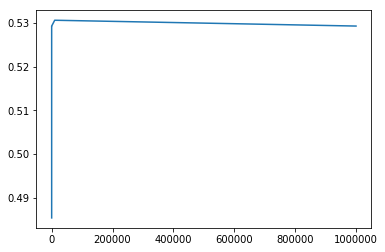

In [106]:
c = [.0001, .01, 1, 100, 10000, 1000000]
accuracies = []
for lamVal in c:
    print("For lamba = " + str(lamVal))
    w, w0, acc, prec , recal , fscore, _ = runLogReg(x_train, y_train, x_test, y_test, lamb = lamVal)
    accuracies.append(acc)
    print("\tW-vector: " + str(w[0]))
    print("\tw0: " + str(w0[0]))
    print("\tAcc: " + str(acc))
    print("\tPrecision: " + str(prec))
    print("\tRecall: " + str(recal))
    print("\tfscore: " + str(fscore))
    
plt.plot(c, accuracies)
#TODO: plot accuracy vs c
# NOTES for the future:
# make tables for different values of C and the corresponding prec/recal/fscore
# use lasso regression to figure out which features are necessary

In [107]:
"""
TODO:
** Make tables for different values of C and the corresponding prec/recal/fscore
** (Use lasso regression to figure out which features are necessary)
** Add SVM
    ** Multiple kernles
** Neural Net
    stuff done on HW 6:
    ** Change number of hidden layers
    ** Change the function
    ** regularization term
"""

'\nTODO:\n** Make tables for different values of C and the corresponding prec/recal/fscore\n** (Use lasso regression to figure out which features are necessary)\n** Add SVM\n    ** Multiple kernles\n** Neural Net\n    stuff done on HW 6:\n    ** Change number of hidden layers\n    ** Change the function\n    ** regularization term\n'

## Predicting quality using SVM

In [281]:
"""
TODO:
** maybe just make the data selector into a fucntion where you can choose the axis you want to predict.
"""
red_y = red[:, -2] # select the quality column
white_y = white[:, -2]
red_y = np.reshape(red_y, (len(red_y), 1))
white_y = np.reshape(white_y, (len(white_y), 1))

red_x = np.delete(red, 11, axis = 1) # get all columns besides the quality
white_x = np.delete(white, 11, axis = 1)
x = np.vstack((red_x, white_x))
df = pd.DataFrame(x)
# Scale x data
x_scale = preprocessing.scale(x)
# Combine y's from red and white into a single vector
y = np.vstack((red_y, white_y))
x_train, x_test, y_train, y_test = train_test_split(x_scale, y)

In [282]:
def runSVM(x_train, y_train, x_test, y_test, m_i = -1, c = 1, k = "rbf", deg = 3):
    clf = svm.SVC(C = c, kernel = k, degree = deg, max_iter = m_i)
    clf.fit(x_train, y_train)
    acc = clf.score(x_test, y_test)
    prec , recal , fscore,_ = precision_recall_fscore_support(y_test, y_hat)
    return acc, prec , recal , fscore,_

In [283]:
def getResults(kernel, Cs, degrees = None, num_iters = 100000):
    results = dict()
    if (kernel != "poly"):
        """
        {
            C: {
                acc:
                prec:
                recall:
                fscore:
            }
        }
        """
        for C in Cs:
            results[C] = dict()
            acc, prec , recal , fscore,_ = runSVM(x_train, y_train, x_test, y_test, m_i = num_iters, c = C, k = kernel)
            results[C]["acc"] = acc
            results[C]["prec"] = prec
            results[C]["recall"] = recal
            results[C]["fscore"] = fscore
    else:
        """
        {
            degree: {
                C: {
                    acc:
                    prec:
                    recall:
                    fscore:
                }
            }
        }
        """
        for degree in degrees:
            results[degree] = dict()
            for C in Cs:
                results[degree][C] = dict()
                acc, prec , recal , fscore,_ = runSVM(x_train, y_train, x_test, y_test, m_i = num_iters, c = C, k = "poly", deg = degree)
                results[degree][C]["acc"] = acc
                results[degree][C]["prec"] = prec
                results[degree][C]["recall"] = recal
                results[degree][C]["fscore"] = fscore
    return results

Cs = [.00001, .01, 1, 100, 10000]
degrees = [2, 3, 4, 5, 6]

rbf_results = getResults(kernel = "rbf", Cs = Cs) 
poly_results = getResults(kernel = "poly", Cs = Cs, degrees = degrees)
linear_results = getResults(kernel = "linear", Cs = Cs)
sigmoid_results = getResults(kernel = "sigmoid", Cs = Cs)

/Users/jonathansassoon/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jonathansassoon/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jonathansassoon/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Text(0,0.5,'Accuracy')

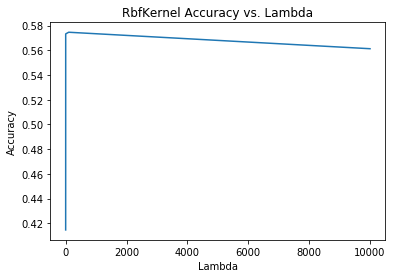

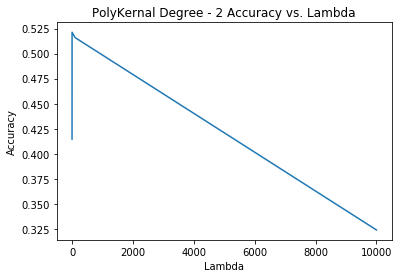

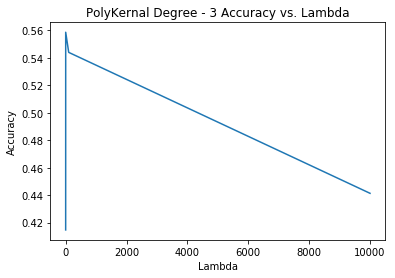

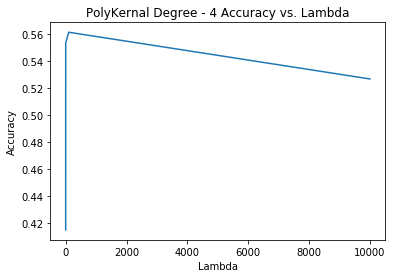

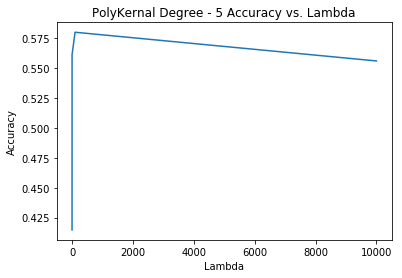

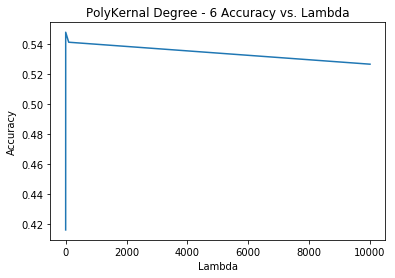

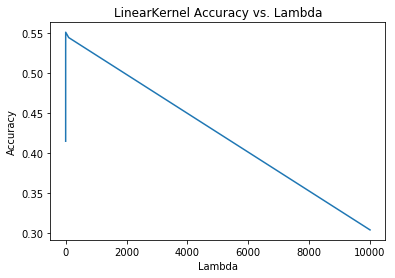

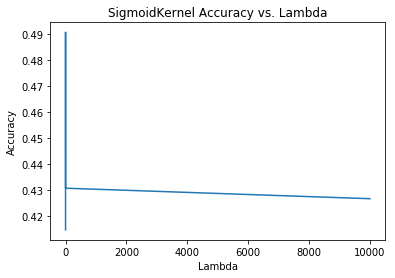

In [288]:
x_label = "Lambda"
y_label = "Accuracy"

rbf_accs = [rbf_results[C]["acc"] for C in Cs]
plt.figure(0)
plt.plot(Cs, rbf_accs)
plt.title("RbfKernel " + y_label + " vs. " + x_label)
plt.xlabel(x_label)
plt.ylabel(y_label)

for i in range(len(degrees)):
    poly_accs = [poly_results[degrees[i]][C]["acc"] for C in Cs]
    plt.figure(i+1)
    plt.plot(Cs, poly_accs)
    plt.title("PolyKernal Degree - " + str(degrees[i]) + " " + y_label + " vs. " + x_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
linear_accs = [linear_results[C]["acc"] for C in Cs]
plt.figure(i+2)
plt.plot(Cs, linear_accs)
plt.title("LinearKernel " + y_label + " vs. " + x_label)
plt.xlabel(x_label)
plt.ylabel(y_label)

sigmoid_accs = [sigmoid_results[C]["acc"] for C in Cs]
plt.figure(i+3)
plt.plot(Cs, sigmoid_accs)
plt.title("SigmoidKernel " + y_label + " vs. " + x_label)
plt.xlabel(x_label)
plt.ylabel(y_label)

In [287]:
print("For rbf, the best accuracy was {}%".format(round(max(rbf_accs) * 100, 2)))
print("For linear, the best accuracy was {}%".format(round(max(linear_accs) * 100, 2)))
print("For sigmoid, the best accuracy was {}%".format(round(max(sigmoid_accs) * 100, 2)))

For rbf, the best accuracy was 57.47%
For linear, the best accuracy was 55.07%
For sigmoid, the best accuracy was 49.07%
